Ships and Bikes model:

In [2]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
%load_ext tensorboard
from tensorboard.plugins.hparams import api as hp

2.2.0-rc2


In [3]:
ships_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")#ship synset
print(ships_page.content)
# BeautifulSoup is an HTML parsing library
ships_soup = BeautifulSoup(ships_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")#bicycle synset
print(bikes_page.content)
# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

Split the URLs (each on a separate line) and store in a list

In [4]:
str_ships_soup=str(ships_soup)#convert soup to string so it can be split
type(str_ships_soup)
ships_split_urls=str_ships_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the ships list is ",len(ships_split_urls))#print the length of the list so you know how many urls you have

bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print("The length of the bikes list is ", len(bikes_split_urls))

The length of the ships list is  1262
The length of the bikes list is  1345


Make training and validation directories

In [0]:
!mkdir /content/train 
!mkdir /content/train/ships 
!mkdir /content/train/bikes 
!mkdir /content/validation
!mkdir /content/validation/ships 
!mkdir /content/validation/bikes 

Correct the images shape, format, and store them on the corresponding directory

In [6]:
img_rows, img_cols = 32, 32 
input_shape = (img_rows, img_cols, 3)
def url_to_image(url):
 # download the image, convert it to a NumPy array, and then read
 # it into OpenCV format
 resp = urllib.request.urlopen(url)
 image = np.asarray(bytearray(resp.read()), dtype="uint8")
 image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 return image

n_of_training_images=100 
for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not ships_split_urls[progress] == None:
      try:
        I = url_to_image(ships_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/ships/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None

for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/bikes/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
#Validation data:

for progress in range(50):
    if(progress%20==0):
        print(progress)
    if not ships_split_urls[progress] == None:
      try:
        I = url_to_image(ships_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/ships/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None

for progress in range(50):
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        I = url_to_image(bikes_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)
      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships 
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes 
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships 
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes 


0
20
40
60
80
0
20
40
60
80
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg   img24.jpg  img35.jpg  img4.jpg   img62.jpg  img74.jpg  img93.jpg
img11.jpg  img25.jpg  img39.jpg  img51.jpg  img63.jpg  img76.jpg  img94.jpg
img12.jpg  img26.jpg  img3.jpg	 img52.jpg  img64.jpg  img77.jpg  img95.jpg
img14.jpg  img28.jpg  img40.jpg  img54.jpg  img66.jpg  img78.jpg  img96.jpg
img15.jpg  img29.jpg  img43.jpg  img55.jpg  img67.jpg  img83.jpg  img97.jpg
img16.jpg  img31.jpg  img46.jpg  img56.jpg  img69.jpg  img86.jpg  img99.jpg
img17.jpg  img32.jpg  img47.jpg  img59.jpg  img6.jpg   img8.jpg
img18.jpg  img33.jpg  img48.jpg  img5.jpg   img72.jpg  img91.jpg
img23.jpg  img34.jpg  img49.jpg  img60.jpg  img73.jpg  img92.jpg

list the files inside bikes directory:

img10.jpg  img27.jpg  img45.jpg  img59.jpg  img70.jpg  img82.jpg  img93.jpg
img13.jpg  img31.jpg  img47.jpg  img5.jpg   img71.jpg  img83.jpg  img95.jpg
img14.jpg  img33.jpg  img48.jpg  img60.jpg  img72.jpg  img84.jpg

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=50,
                                   horizontal_flip=True,
                                   brightness_range=(0.5,1.5),
                                   zoom_range=0.5,
                                   fill_mode='nearest')
                                   
validation_datagen = ImageDataGenerator(rescale=1/255)


Building the model:

In [8]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_rows, img_cols, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')                               
  ])
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
train_generator = train_datagen.flow_from_directory(
        '/content/train/',
        target_size=(32, 32),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/content/validation/',  
        target_size=(32, 32),  
        batch_size=14,
        class_mode='binary')
model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs=30,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=10
  )


Found 119 images belonging to 2 classes.
Found 69 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
10/10 [==============================] - 2s 163ms/step - loss: 0.6975 - accuracy: 0.5327 - val_loss: 0.6694 - val_accuracy: 0.5217
Epoch 2/30
10/10 [==============================] - 2s 152ms/step - loss: 0.6937 - accuracy: 0.6010 - val_loss: 0.6037 - val_accuracy: 0.7826
Epoch 3/30
10/10 [==============================] - 2s 153ms/step - loss: 0.6524 - accuracy: 0.6061 - val_loss: 0.5519 - val_accuracy: 0.7754
Epoch 4/30
10/10 [==============================] - 2s 155ms/step - loss: 0.6234 - accuracy: 0.6633 - val_loss: 0.4791 - val_accuracy: 0.8913
Epoch 5/30
10/10 [==============================] - 2s 152ms/step - loss: 0.5297 - accuracy: 0.7475 - val_loss: 0.4883 - val_accuracy: 0.7319
Epoch 6/30
10/10 [==============================] - 2s 151ms/step - loss: 0.5732 - accuracy: 0.7172 - val_loss: 0.5326 - val_accuracy

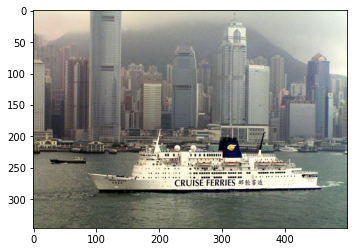

In [9]:
plt.imshow(PIL.Image.open("/content/validation/ships/img11.jpg"))

Using TensorFlow backend.


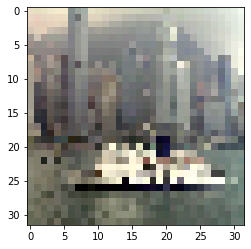

In [10]:
from keras.preprocessing import image

img_path='/content/validation/ships/img11.jpg'
img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

In [0]:
layer_outputs = [layer.output for layer in model.layers[:13]]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


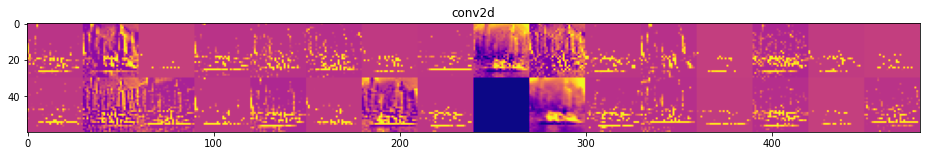

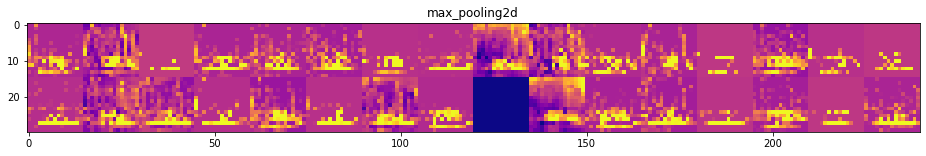

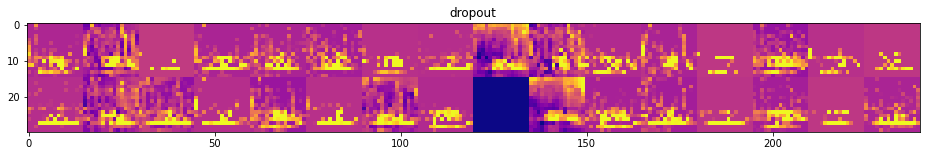

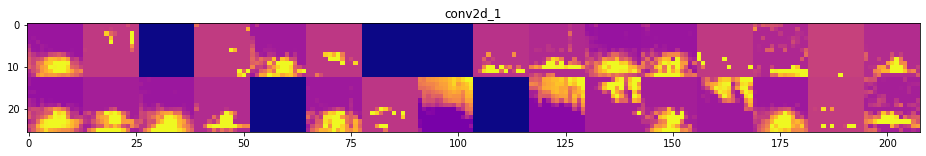

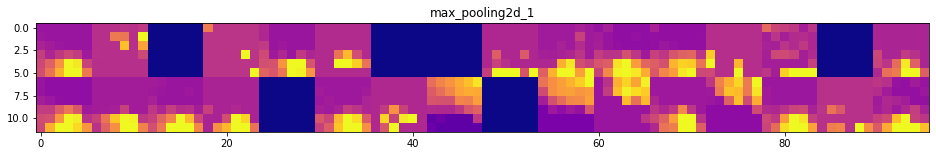

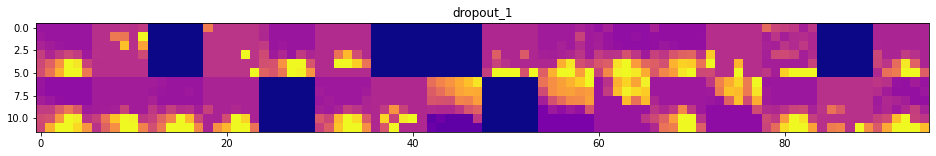

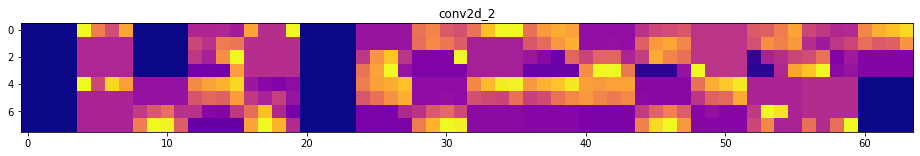

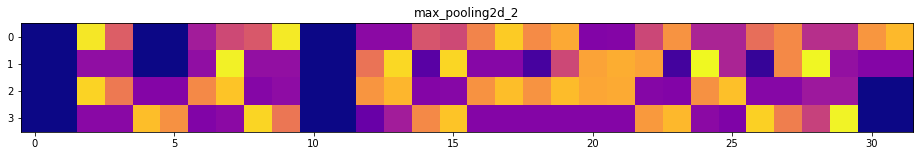

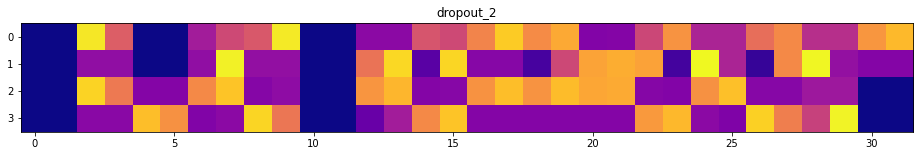

In [12]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] 
    size = layer_activation.shape[1] 
    n_cols = n_features // images_per_row 
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): 
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() 
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, 
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')